## BASELINE PREDICTION      

Before making a forecast it is good to perform a baseline prediction. Baseline is a type of 'naive' forecast that is simple to make and it presents the lower bounds of error for our forecasting models. By comparing our model to the baseline we can quickly get the idea if our model is performing well or not.    

The baseline used here is called the basic persistence model. It takes the value from the previos day as input and returns the same value as the output of the forecast for the next day.

In [13]:
from utils import *
from baseline import *

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### ONE STEP BASELINE      

In [14]:
df_t = read_target_df('water_level/Jamnicka kiselica H.csv')
values = df_t.values
train, test = df_t.target.values[:-365], df_t.target.values[-365:]

In [15]:
prediction = one_step_baseline_prediction(train, test)

RMSE: 53.182
MAE: 31.893


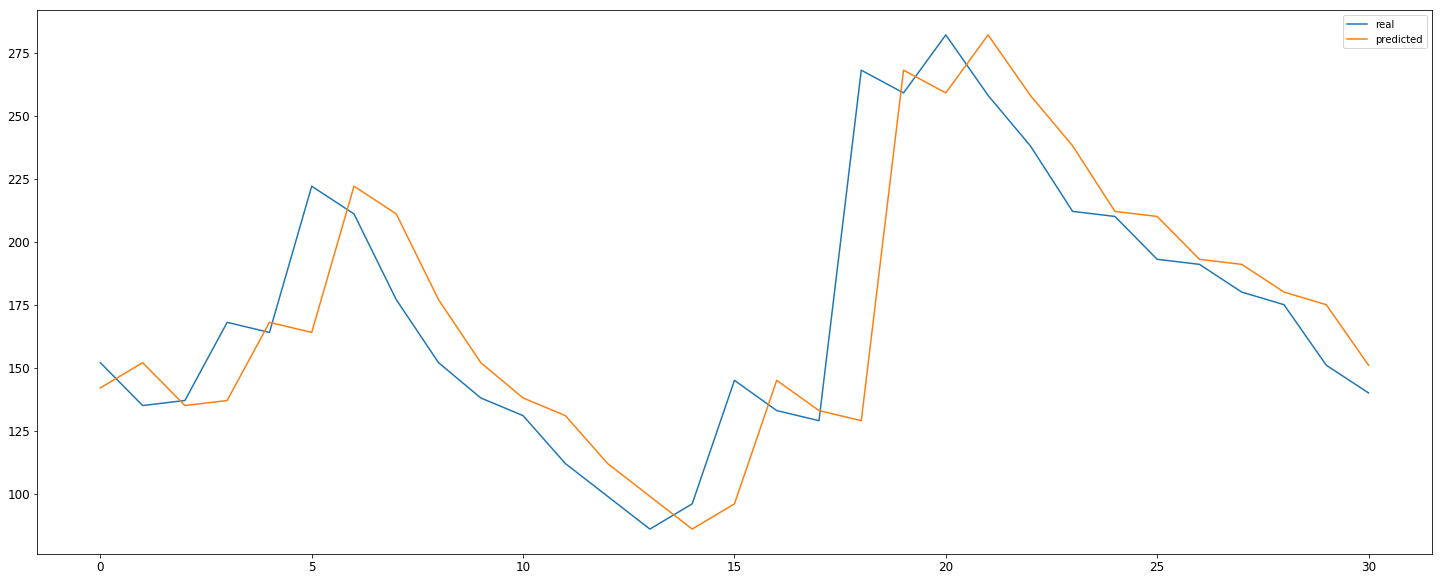

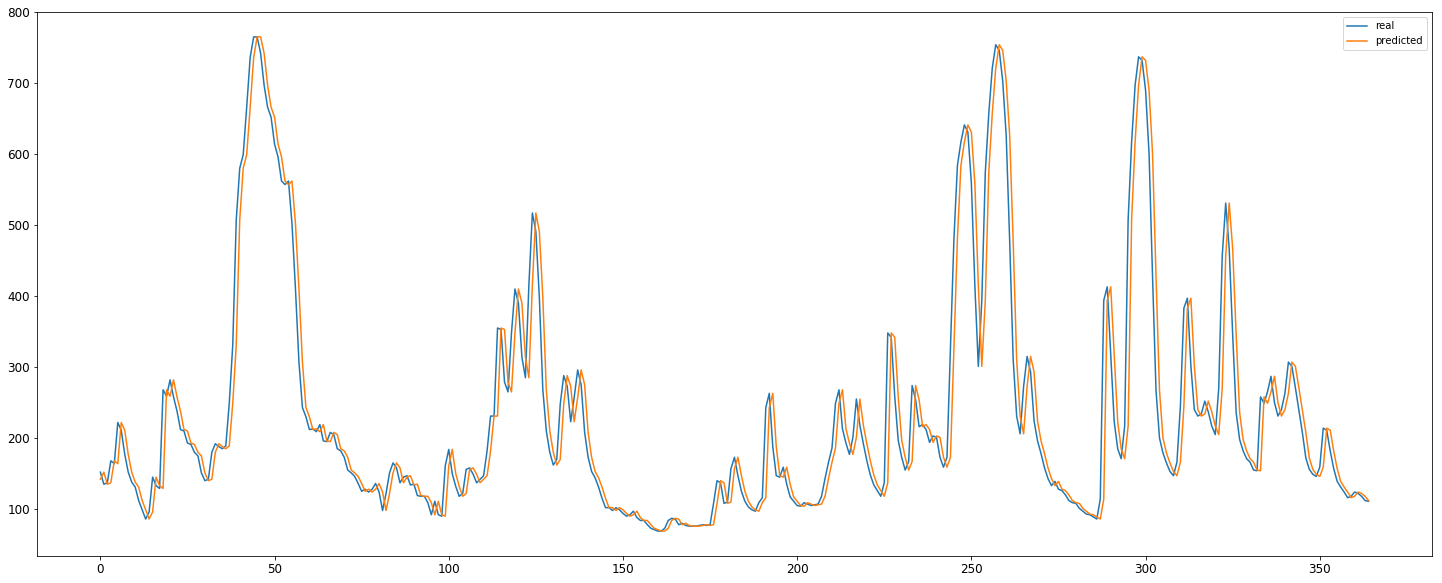

53.18236910444705

In [16]:
report_performance(test, prediction)

### MULTI STEP BASELINE      

In [17]:
n_forecast_days = 5
n_test_days = 360

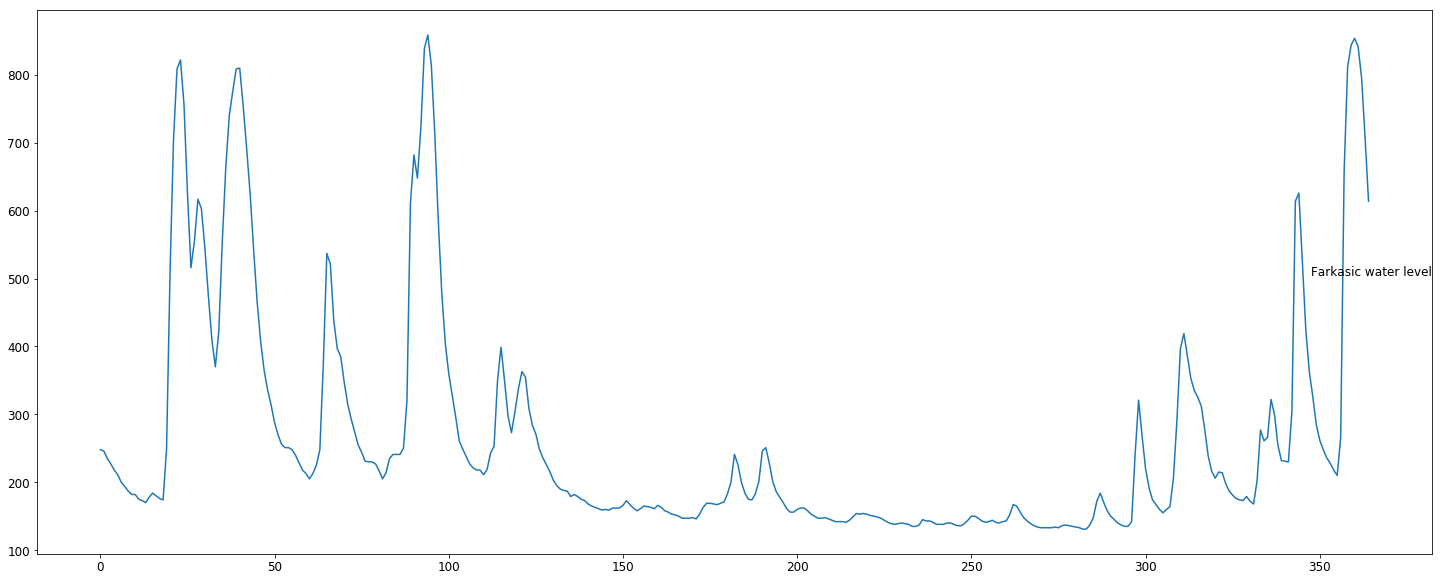

In [18]:
df_t = read_target_df('water_level/Farkasic H.csv')
dataset = DataFrame()
dataset["Farkasic water level"] = df_t.target

plot_multi_dataframe(dataset, 0, 365)

In [19]:
values = dataset.values
train = values[:-n_test_days, :]
test = values[-n_test_days:, :]
print(train.shape, test.shape)

(1831, 1) (360, 1)


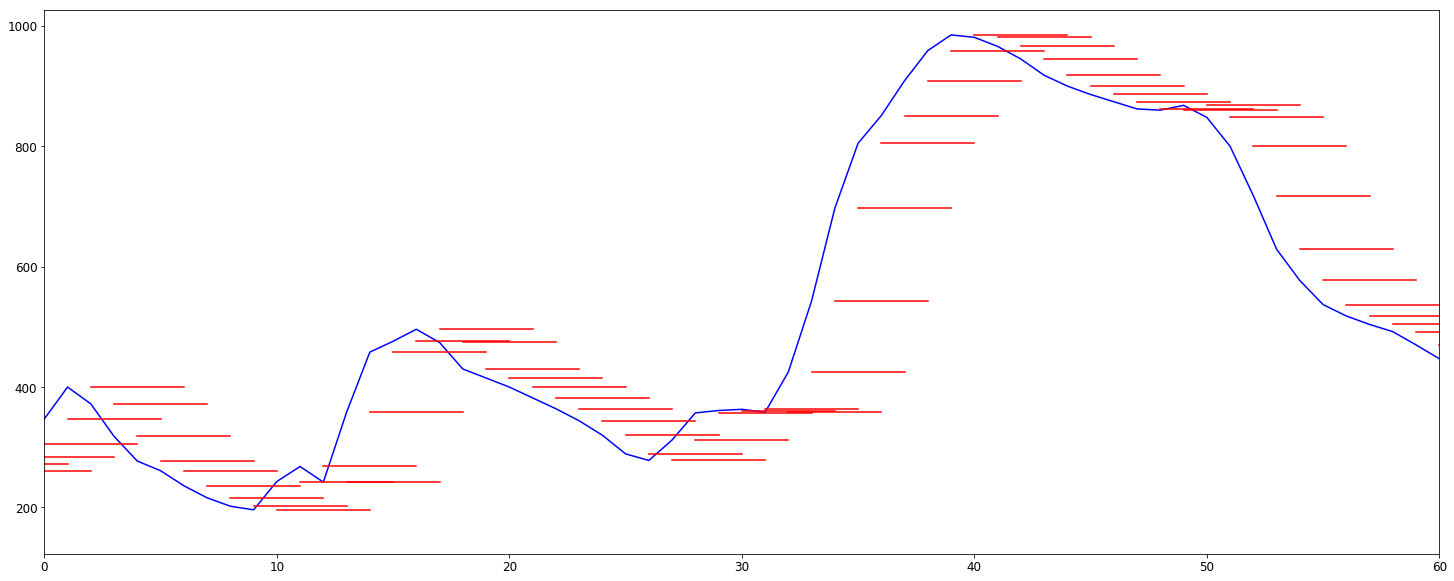

In [20]:
baseline = np.asarray(multistep_baseline_prediction(train, test, n_forecast_days))
plot_multivar_results(test, baseline, n_forecast_days, 0, 60)